In [1]:
import sys
sys.path.append('..')
from pyzx.graph import Graph
from pyzx.rules import *
from pyzx.examples import zigzag2, zigzag
from pyzx.drawing import draw

Available backends: simple, igraph


In [2]:
g = zigzag2(20, backend='igraph')

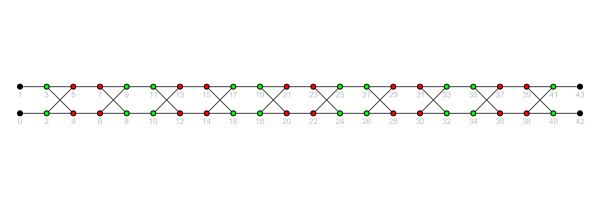

In [3]:
draw(g)

In [4]:
match_spider_parallel(g)

[[4, 6],
 [12, 14],
 [20, 22],
 [28, 30],
 [36, 38],
 [5, 7],
 [13, 15],
 [21, 23],
 [29, 31],
 [37, 39]]

In [7]:
new_matches = True
while new_matches:
    new_matches = False
    m = match_spider_parallel(g)
    if len(m) > 0:
        spider(g, m)
        new_matches = True
    m = match_bialg_parallel(g)
    if len(m) > 0:
        bialg(g, m)
        new_matches = True

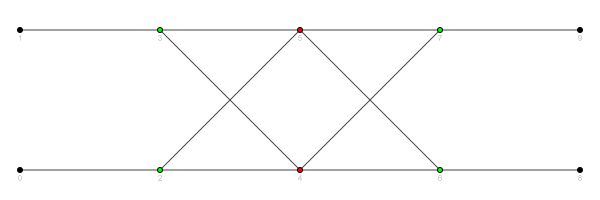

In [8]:
draw(g)

In [19]:
%time g = zigzag2(1000000, backend='igraph')

def f(g):
    new_matches = True
    i = 0
    while new_matches:
        i += 1
        new_matches = False
        m = match_spider_parallel(g)
        if len(m) > 0:
            spider(g, m)
            print(str(len(m)) + ' spider')
            new_matches = True
        m = match_bialg_parallel(g)
        if len(m) > 0:
            bialg(g, m)
            print(str(len(m)) + ' bialg')
            new_matches = True
    print('finished in ' + str(i) + ' iterations')

%time f(g)

Wall time: 2.71 s
500000 spider
499998 spider
125000 bialg
62500 bialg
31250 bialg
15625 bialg
7813 bialg
3906 bialg
1953 bialg
977 bialg
488 bialg
244 bialg
122 bialg
61 bialg
31 bialg
15 bialg
8 bialg
4 bialg
2 bialg
finished in 19 iterations
Wall time: 33.9 s


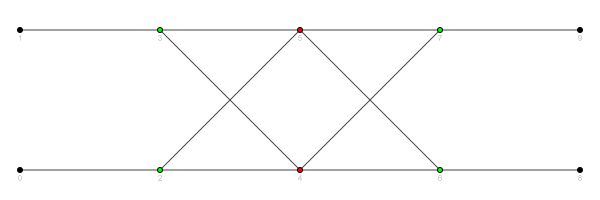

In [20]:
draw(g)